In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Here’s what each column in your dataset likely represents (common in customer churn datasets like Telco or bank customer data):

| Column Name         | Description                                                                                             |
| ------------------- | ------------------------------------------------------------------------------------------------------- |
| **RowNumber**       | Row index or serial number for identification (not useful for analysis).                                |
| **CustomerId**      | Unique ID for the customer (used to identify customers).                                                |
| **Surname**         | Customer's last name (generally not useful for modeling unless doing specific name-based analysis).     |
| **CreditScore**     | A score indicating the customer's creditworthiness. Higher usually means lower risk.                    |
| **Geography**       | Country or region where the customer resides (e.g., France, Germany, Spain).                            |
| **Gender**          | Customer's gender (e.g., Male/Female).                                                                  |
| **Age**             | Age of the customer.                                                                                    |
| **Tenure**          | Number of years the customer has been with the bank.                                                    |
| **Balance**         | Account balance (amount of money the customer has in the bank).                                         |
| **NumOfProducts**   | Number of bank products the customer is using (e.g., credit card, loan, savings account).               |
| **HasCrCard**       | Whether the customer has a credit card (1 = Yes, 0 = No).                                               |
| **IsActiveMember**  | Whether the customer is active (1 = Yes, 0 = No).                                                       |
| **EstimatedSalary** | Estimated annual salary of the customer.                                                                |
| **Exited**          | Target variable. Indicates whether the customer has left the bank (1 = Yes, churned; 0 = No, retained). |

Would you like help preparing this dataset for machine learning (e.g., preprocessing, encoding, etc.)?


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()


0

In [6]:
df['Exited'].value_counts()
#look lke but we have to just learn how deep learning works here ,

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0


### we are avoiding EDA, we are just learning

In [11]:
# converting categorical values to numberical so need encoding
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)


In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


In [14]:
df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']] = df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']].astype(int)


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int64  
 10  Geography_Spain    10000 non-null  int64  
 11  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [17]:
X=df.drop(columns=['Exited'])#temporary drop  Exited and other  ko store in X
y=df['Exited'] 

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [19]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [20]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_trained_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [22]:
X_trained_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense



2025-06-19 08:42:41.291008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750322561.531419      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750322561.601533      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [24]:
#model = Sequential()
#model.add( Dense(3,activation='relu',input_dim=11))
#model.add( Dense(1,activation='sigmoid'))

# optimising code
model = Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-19 08:42:55.607979: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

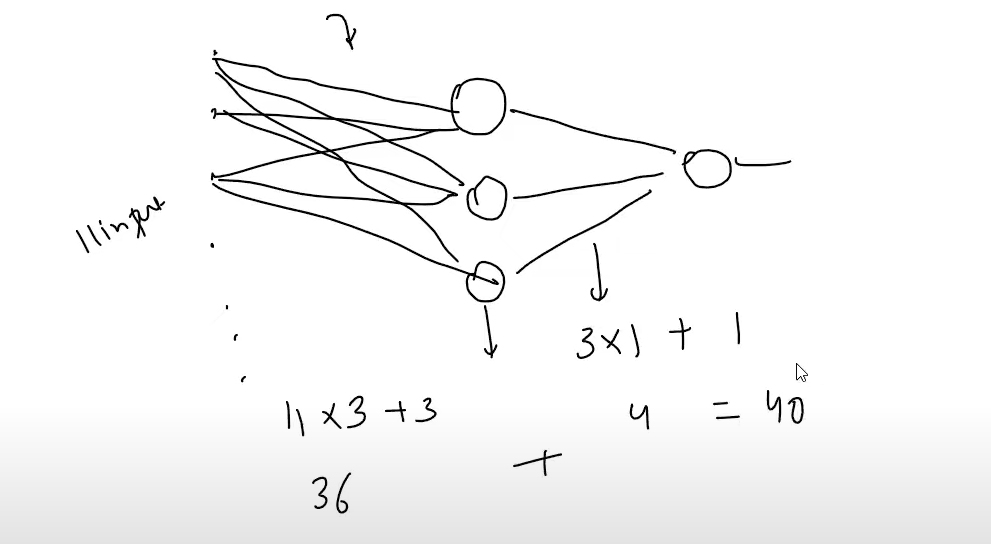

In [26]:
#compilation
model.compile(loss = 'binary_crossentropy',optimizer='Adam',metrics=['Accuracy'])



In [27]:
# history = model.fit(X_trained_scaled,y_train,epochs =100,validation_split=0.2)
#improve
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Accuracy: 0.7975 - loss: 0.5855 - val_Accuracy: 0.7975 - val_loss: 0.5044
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7905 - loss: 0.5092 - val_Accuracy: 0.7975 - val_loss: 0.4979
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7899 - loss: 0.5083 - val_Accuracy: 0.7975 - val_loss: 0.4973
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7981 - loss: 0.4985 - val_Accuracy: 0.7975 - val_loss: 0.4973
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7888 - loss: 0.5098 - val_Accuracy: 0.7975 - val_loss: 0.4971
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7925 - loss: 0.5046 - val_Accuracy: 0.7975 - val_loss: 0.4965
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7897 - loss: 0.5089 - val_Accuracy: 0.7975 - val_loss: 0.4963
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.8002 - loss: 0.4932 - val_Accu

### training ka loss incerasekrna chahiye, loss km  also validation mai nhi to overfitting ho jaayega agr bs training acc is increases

In [28]:
model.layers[0].get_weights() #show 33 weights +3 bias for 1layer  

[array([[ 3.48877788e-01, -2.73409188e-01,  4.70969409e-01,
         -2.77889967e-01, -3.19054037e-01, -3.31835449e-02,
          1.41656339e-01,  3.67436826e-01,  3.72019738e-01,
          8.87985826e-02, -3.18285683e-03],
        [ 1.08133651e-01,  2.63516158e-01, -2.92243809e-01,
          2.14237556e-01, -7.83562437e-02, -4.50009167e-01,
         -4.44880605e-01,  5.58418036e-03, -7.16547593e-02,
         -4.24294114e-01,  2.19329908e-01],
        [ 1.82507232e-01, -2.49217302e-01,  7.53204226e-02,
          3.36336970e-01, -3.70761119e-02,  1.58328354e-01,
         -3.88728321e-01, -5.79023361e-03,  2.20230713e-01,
         -4.81959045e-01, -7.92845413e-02],
        [ 3.42836650e-03, -4.73693222e-01, -3.37091267e-01,
         -4.20369416e-01, -7.22059086e-02, -2.03315556e-01,
          4.34224904e-01, -5.13605297e-01, -2.43742347e-01,
         -3.71296883e-01, -2.40083522e-04],
        [-2.48544648e-01, -4.18328941e-01, -3.25440794e-01,
          2.08220541e-01, -3.53049636e-01,  

In [29]:
model.layers[1].get_weights() #show 3 weights and 1 bias for 2layer  

[array([[-0.33516362, -0.46761572,  0.02699392,  0.12916228, -0.31576532,
         -0.4571421 , -0.27044514, -0.08895902,  0.37562388,  0.16207998,
          0.32701185],
        [-0.3215887 ,  0.08992661, -0.23376967, -0.13194679, -0.07476679,
          0.2850639 , -0.5627475 , -0.37401655, -0.41467986,  0.05713133,
          0.01332113],
        [-0.21202296,  0.02730181, -0.34132165, -0.5210371 , -0.29747796,
         -0.24678674, -0.42174804, -0.21843576,  0.1529569 ,  0.14321932,
          0.11446185],
        [-0.16351806,  0.5871735 , -0.16510637, -0.11260808,  0.00582889,
         -0.27712125,  0.43255833,  0.17058565, -0.03491348,  0.18435524,
          0.2937088 ],
        [ 0.39983782, -0.34598088,  0.22941007, -0.5867555 ,  0.0802646 ,
          0.4215889 ,  0.27647272,  0.5985309 ,  0.06864067,  0.05559077,
          0.46710816],
        [ 0.44210964,  0.03943223,  0.19146496,  0.2200979 , -0.4422543 ,
         -0.24794194,  0.46332175,  0.1801526 ,  0.20808989,  0.1643402

In [30]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [31]:
#let threshold is 0.5 , wese hum ROC se nikalate hai
y_pred = np.where(y_log>0.5 , 1, 0)




In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7925

Here are the **top 8 most effective ways** to improve accuracy in a **basic deep learning model**:

---

### ✅ **Top 8 Tips to Increase Accuracy in Deep Learning**

1. **Collect More Data**
   → More training examples help the model generalize better.

2. **Feature Scaling (Normalization/Standardization)**
   → Scale input features using `MinMaxScaler` or `StandardScaler` to speed up and stabilize learning.

3. **Add More Layers or Neurons**
   → A deeper or wider network can learn more complex patterns.

4. **Use a Better Optimizer (Adam > SGD)**
   → Use `Adam` for faster and more stable convergence.

5. **Use Dropout for Regularization**
   → Prevent overfitting by randomly disabling neurons during training.

6. **Use Batch Normalization**
   → Normalizes layer outputs, improves stability and training speed.

7. **Train for More Epochs (With Early Stopping)**
   → Allow the model to learn more, but stop when validation loss stops improving.

8. **Hyperparameter Tuning**
   → Experiment with learning rate, batch size, layers, units, activation functions.

   
10. **Use Better Activation Functions**
    → Use ReLU, LeakyReLU in hidden layers; softmax/sigmoid in output.


---

Let me know if you'd like code examples for any of these.


In [33]:
import matplotlib.pyplot as plt

In [34]:
history.history

{'Accuracy': [0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574

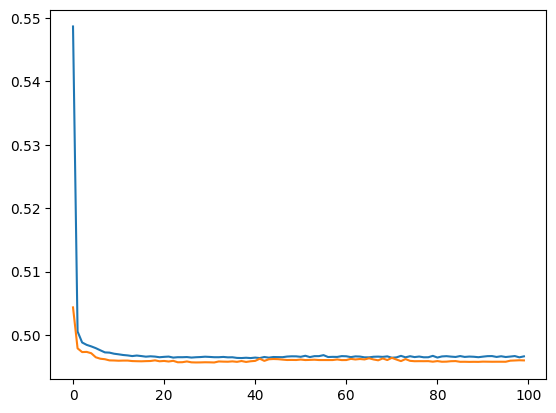

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

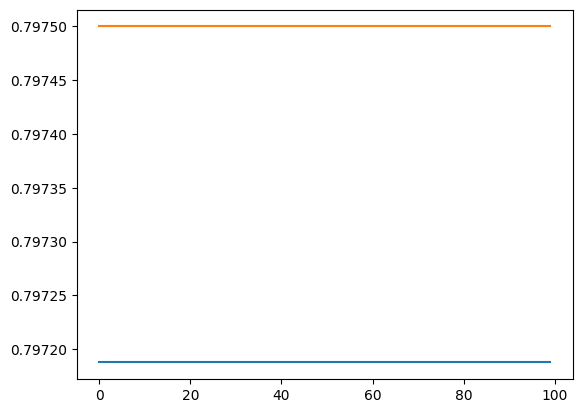

In [36]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])